In [1]:
#pip install pandas openpyxl

# Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# 1. Introduction to the Dataset and Problem

In [3]:
data = pd.read_excel('Historicalinvesttemp.xlsx', engine='openpyxl')

In [4]:
print("Dataset Overview:")
print(data.head(8))
print("\nDataset Information:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

Dataset Overview:
   Year  Stocks T.Bills T.Bonds
0  1928  0.4381  0.0308  0.0084
1  1929  -0.083  0.0316   0.042
2  1930 -0.2512  0.0455  0.0454
3  1931 -0.4384  0.0231 -0.0256
4  1932 -0.0864  0.0107  0.0879
5  1933  0.4998  0.0096  0.0186
6  1934 -0.0119   0.003  0.0796
7  1935  0.4674  0.0023  0.0447

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     83 non-null     object
 1   Stocks   83 non-null     object
 2   T.Bills  83 non-null     object
 3   T.Bonds  83 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB
None

Basic Statistics:
        Year   Stocks  T.Bills  T.Bonds
count     83  83.0000  83.0000  83.0000
unique    83  83.0000  79.0000  82.0000
top     1928   0.4381   0.0038   0.0466
freq       1   1.0000   5.0000   2.0000


In [5]:
print("\nObjective: Predict Stock returns based on T.Bills and T.Bonds performance")
print("This is a regression problem focused on financial market prediction.")


Objective: Predict Stock returns based on T.Bills and T.Bonds performance
This is a regression problem focused on financial market prediction.


# 2. Data Preprocessing, Preparation, and Exploratory Data Analysis

In [6]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year       1
Stocks     1
T.Bills    1
T.Bonds    1
dtype: int64


In [7]:
print(data.columns)

Index(['Year', 'Stocks', 'T.Bills', 'T.Bonds'], dtype='object')


In [8]:
# Convert Year to numeric, forcing errors to NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Drop rows where Year is NaN
data = data.dropna(subset=['Year'])

# Convert Year to int
data['Year'] = data['Year'].astype(int)


In [9]:
# Create time-based features
data['Year_Normalized'] = (data['Year'] - data['Year'].min()) / (data['Year'].max() - data['Year'].min())

In [10]:
# Correlation analysis
print("\nCorrelation Matrix:")
correlation = data[['Stocks', 'T.Bills', 'T.Bonds', 'Year_Normalized']].corr()
print(correlation)


Correlation Matrix:
                   Stocks   T.Bills   T.Bonds  Year_Normalized
Stocks           1.000000 -0.246004  0.122827         0.021893
T.Bills         -0.246004  1.000000  0.232733         0.473620
T.Bonds          0.122827  0.232733  1.000000         0.220596
Year_Normalized  0.021893  0.473620  0.220596         1.000000


# Visualize data distribution

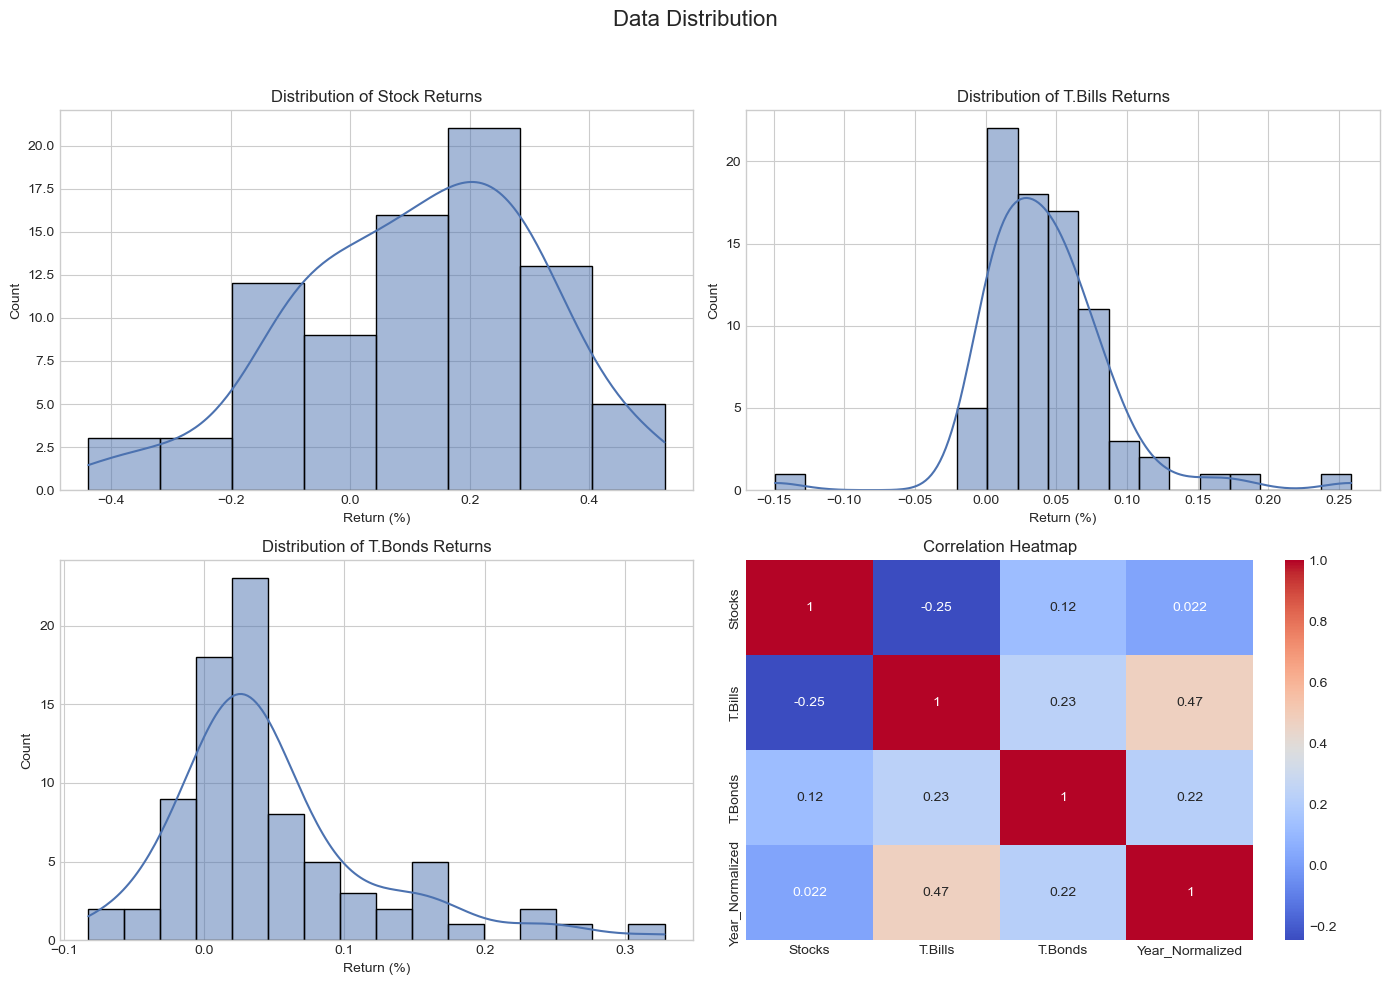

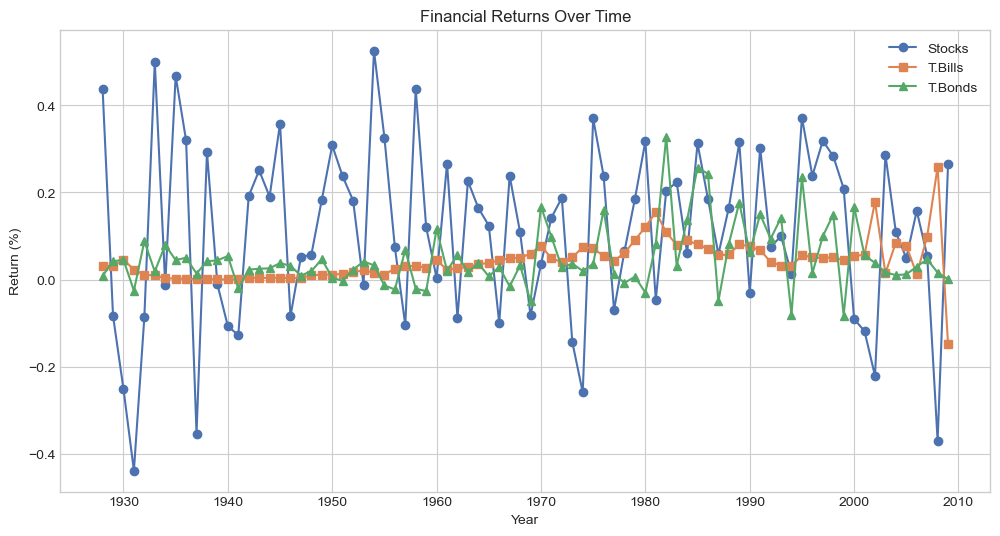

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Data Distribution', fontsize=16)

# Histograms of each variable
sns.histplot(data['Stocks'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Stock Returns')
axes[0, 0].set_xlabel('Return (%)')

sns.histplot(data['T.Bills'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of T.Bills Returns')
axes[0, 1].set_xlabel('Return (%)')

sns.histplot(data['T.Bonds'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of T.Bonds Returns')
axes[1, 0].set_xlabel('Return (%)')

# Correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('data_distribution.png')
plt.show()

# Time series visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Stocks'], marker='o', linestyle='-', label='Stocks')
plt.plot(data['Year'], data['T.Bills'], marker='s', linestyle='-', label='T.Bills')
plt.plot(data['Year'], data['T.Bonds'], marker='^', linestyle='-', label='T.Bonds')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title('Financial Returns Over Time')
plt.legend()
plt.savefig('time_series_visualization.png')
plt.show()

# Statistical summary for each year

In [12]:
print("\nYearly Financial Performance:")
for year in data['Year']:
    year_data = data[data['Year'] == year]
    print(f"Year {year}:")
    print(f"  Stocks: {year_data['Stocks'].values[0]:.2f}%")
    print(f"  T.Bills: {year_data['T.Bills'].values[0]:.2f}%")
    print(f"  T.Bonds: {year_data['T.Bonds'].values[0]:.2f}%")
    print(f"  Market Condition: {'Bull' if year_data['Stocks'].values[0] > 0 else 'Bear'}")
    print("")


Yearly Financial Performance:
Year 1928:
  Stocks: 0.44%
  T.Bills: 0.03%
  T.Bonds: 0.01%
  Market Condition: Bull

Year 1929:
  Stocks: -0.08%
  T.Bills: 0.03%
  T.Bonds: 0.04%
  Market Condition: Bear

Year 1930:
  Stocks: -0.25%
  T.Bills: 0.05%
  T.Bonds: 0.05%
  Market Condition: Bear

Year 1931:
  Stocks: -0.44%
  T.Bills: 0.02%
  T.Bonds: -0.03%
  Market Condition: Bear

Year 1932:
  Stocks: -0.09%
  T.Bills: 0.01%
  T.Bonds: 0.09%
  Market Condition: Bear

Year 1933:
  Stocks: 0.50%
  T.Bills: 0.01%
  T.Bonds: 0.02%
  Market Condition: Bull

Year 1934:
  Stocks: -0.01%
  T.Bills: 0.00%
  T.Bonds: 0.08%
  Market Condition: Bear

Year 1935:
  Stocks: 0.47%
  T.Bills: 0.00%
  T.Bonds: 0.04%
  Market Condition: Bull

Year 1936:
  Stocks: 0.32%
  T.Bills: 0.00%
  T.Bonds: 0.05%
  Market Condition: Bull

Year 1937:
  Stocks: -0.35%
  T.Bills: 0.00%
  T.Bonds: 0.01%
  Market Condition: Bear

Year 1938:
  Stocks: 0.29%
  T.Bills: 0.00%
  T.Bonds: 0.04%
  Market Condition: Bull

Year 

In [13]:
# Feature engineering: Create lag features
data['T.Bills_Lag1'] = data['T.Bills'].shift(1)
data['T.Bonds_Lag1'] = data['T.Bonds'].shift(1)
data = data.dropna() 

In [14]:
print("Dataset after feature engineering:")
print(data.head())

Dataset after feature engineering:
   Year  Stocks T.Bills T.Bonds  Year_Normalized T.Bills_Lag1 T.Bonds_Lag1
1  1929  -0.083  0.0316   0.042         0.012346       0.0308       0.0084
2  1930 -0.2512  0.0455  0.0454         0.024691       0.0316        0.042
3  1931 -0.4384  0.0231 -0.0256         0.037037       0.0455       0.0454
4  1932 -0.0864  0.0107  0.0879         0.049383       0.0231      -0.0256
5  1933  0.4998  0.0096  0.0186         0.061728       0.0107       0.0879


# 3. Implementation of Machine Learning Models

In [15]:
# Prepare features and target
X = data[['T.Bills', 'T.Bonds', 'T.Bills_Lag1', 'T.Bonds_Lag1', 'Year_Normalized']]
y = data['Stocks']

In [16]:
# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 56 samples
Testing set size: 25 samples


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Linear Regression

In [18]:
print("\nModel 1: Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"  Linear Regression Coefficients: {lr_model.coef_}")
print(f"  Linear Regression Intercept: {lr_model.intercept_}")
print(f"  Mean Squared Error: {mse_lr:.2f}")
print(f"  R² Score: {r2_lr:.2f}")


Model 1: Linear Regression
  Linear Regression Coefficients: [-0.07154837  0.04359999 -0.01173218  0.00985171  0.03906035]
  Linear Regression Intercept: 0.12509285714285714
  Mean Squared Error: 0.03
  R² Score: 0.11


# Model 2: Random Forest Regressor


Model 2: Random Forest Regressor
  Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
  Mean Squared Error: 0.04
  R² Score: -0.26

Feature Importance (Random Forest):
           Feature  Importance
4  Year_Normalized    0.284201
3     T.Bonds_Lag1    0.261293
0          T.Bills    0.206959
2     T.Bills_Lag1    0.136085
1          T.Bonds    0.111462


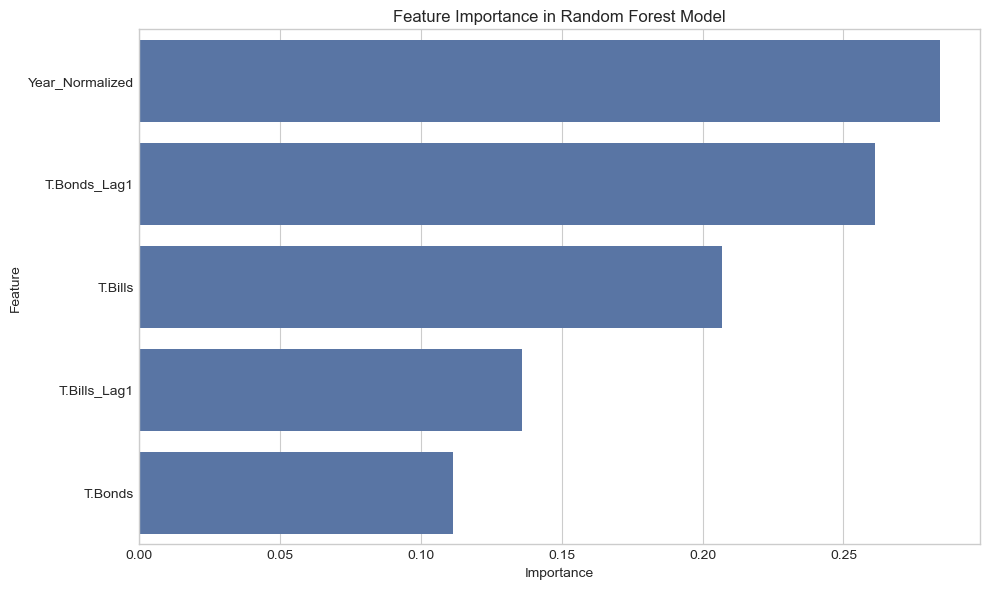

In [19]:
print("\nModel 2: Random Forest Regressor")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # Cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"  Best Parameters: {best_params}")

# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"  Mean Squared Error: {mse_rf:.2f}")
print(f"  R² Score: {r2_rf:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 4. Experimental Evaluation

In [20]:
# Compare models
models = {
    'Linear Regression': {
        'MSE': mse_lr,
        'R²': r2_lr,
        'Predictions': y_pred_lr
    },
    'Random Forest': {
        'MSE': mse_rf,
        'R²': r2_rf,
        'Predictions': y_pred_rf
    }
}

In [21]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'MSE': [models[model]['MSE'] for model in models],
    'R²': [models[model]['R²'] for model in models]
})

print("Model Performance Comparison:")
print(comparison_df)

Model Performance Comparison:
               Model       MSE        R²
0  Linear Regression  0.028512  0.107698
1      Random Forest  0.040136 -0.256112


# Visualize model performance

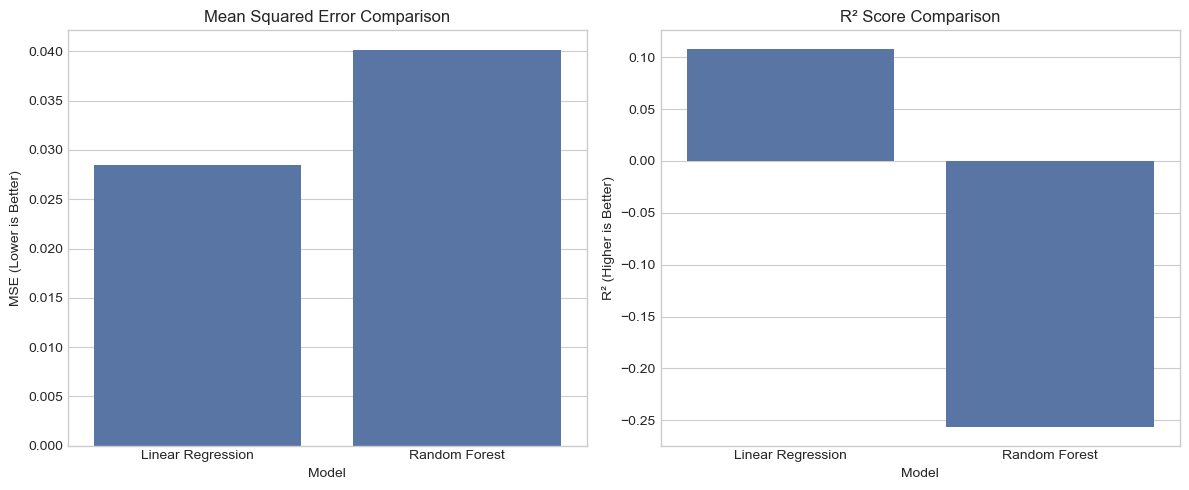

In [22]:
plt.figure(figsize=(12, 5))

# Plot MSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=comparison_df)
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE (Lower is Better)')

# Plot R² comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R²', data=comparison_df)
plt.title('R² Score Comparison')
plt.ylabel('R² (Higher is Better)')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Visualize predictions vs actual

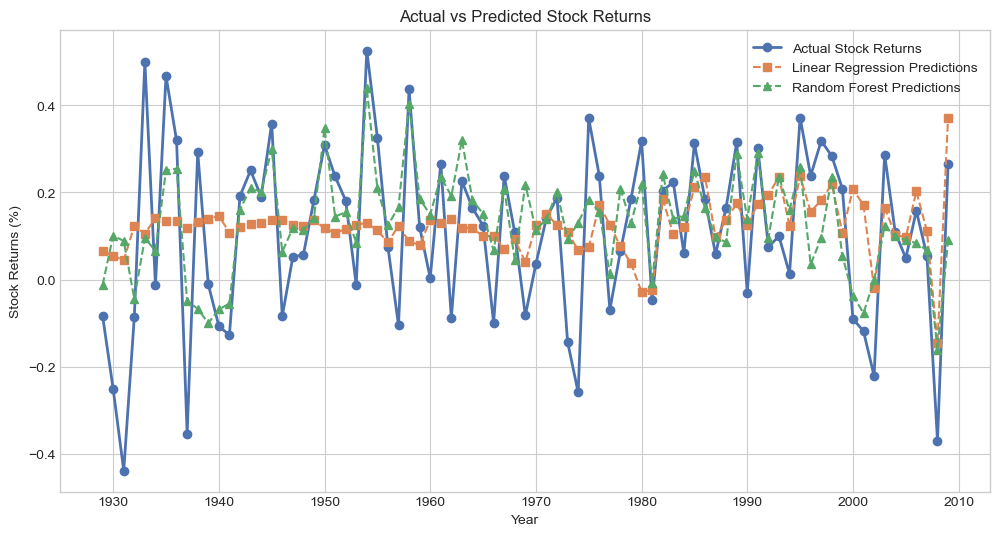

In [23]:
plt.figure(figsize=(12, 6))

# Get predictions for all data points
X_all_scaled = scaler.transform(X)
all_pred_lr = lr_model.predict(X_all_scaled)
all_pred_rf = best_rf_model.predict(X_all_scaled)

# Plot actual vs predicted values
plt.plot(data['Year'], y, marker='o', linestyle='-', label='Actual Stock Returns', linewidth=2)
plt.plot(data['Year'], all_pred_lr, marker='s', linestyle='--', label='Linear Regression Predictions')
plt.plot(data['Year'], all_pred_rf, marker='^', linestyle='--', label='Random Forest Predictions')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Stock Returns (%)')
plt.title('Actual vs Predicted Stock Returns')
plt.legend()
plt.savefig('predictions_comparison.png')
plt.show()

# 5. Results Dissemination and Improvements

In [24]:
# Determine best model
best_model = 'Linear Regression' if r2_lr > r2_rf else 'Random Forest'
print(f"The best performing model is: {best_model}")

if best_model == 'Linear Regression':
    print("Linear Regression performed better with:")
    print(f"  R² Score: {r2_lr:.2f}")
    print(f"  MSE: {mse_lr:.2f}")
    
    # Extract important features based on coefficient magnitude
    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_model.coef_
    })
    coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
    
    print("\nMost influential features (Linear Regression):")
    print(coef_df[['Feature', 'Coefficient']])
else:
    print("Random Forest performed better with:")
    print(f"  R² Score: {r2_rf:.2f}")
    print(f"  MSE: {mse_rf:.2f}")
    
    print("\nMost influential features (Random Forest):")
    print(feature_importance)

The best performing model is: Linear Regression
Linear Regression performed better with:
  R² Score: 0.11
  MSE: 0.03

Most influential features (Linear Regression):
           Feature  Coefficient
0          T.Bills    -0.071548
1          T.Bonds     0.043600
4  Year_Normalized     0.039060
2     T.Bills_Lag1    -0.011732
3     T.Bonds_Lag1     0.009852
